In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Loading the 20newsgroups dataset which is defaultly present in sklearn.datasets

In [3]:
newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))

In [4]:
X = newsgroups.data
y = newsgroups.target

# TF-IDF Vectorization

In [5]:
tfidf = TfidfVectorizer(max_features=10000, stop_words='english')
X_tfidf = tfidf.fit_transform(X)

print("Shape of raw TF-IDF matrix:", X_tfidf.shape)

Shape of raw TF-IDF matrix: (18846, 10000)


# SVD

In [6]:
n_components = 2
svd = TruncatedSVD(n_components=n_components, random_state=42)
X_svd = svd.fit_transform(X_tfidf)
print("Shape of SVD-transformed matrix:", X_svd.shape)

Shape of SVD-transformed matrix: (18846, 2)


# Scatter Plot of First Two SVD Components

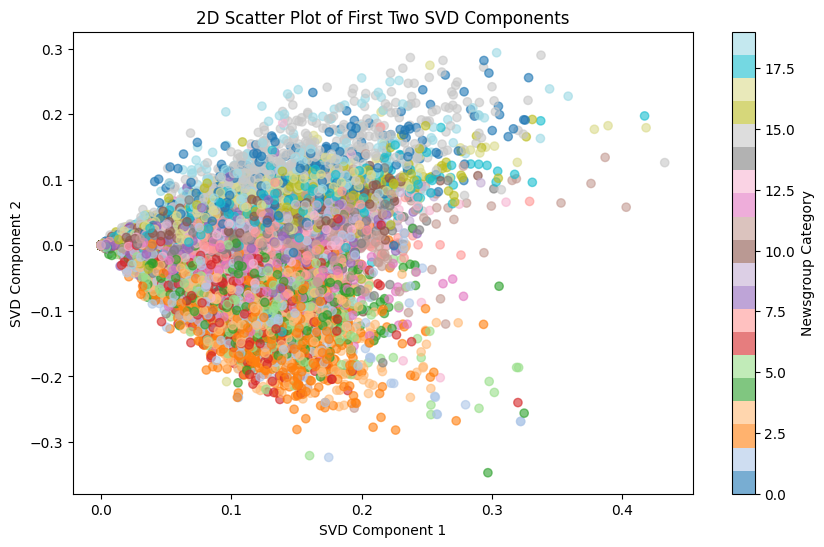

In [7]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_svd[:, 0], X_svd[:, 1], c=y, cmap='tab20', alpha=0.6)
plt.title('2D Scatter Plot of First Two SVD Components')
plt.xlabel('SVD Component 1')
plt.ylabel('SVD Component 2')
plt.colorbar(scatter, label='Newsgroup Category')
plt.show()

# Model Training and Metric Evaluation

In [8]:
kmeans = KMeans(n_clusters=20, random_state=42)
y_pred = kmeans.fit_predict(X_svd)

silhouette_score = silhouette_score(X_svd, y_pred)
print("Silhouette Score for 20 clusters:", round(silhouette_score, 3))

Silhouette Score for 20 clusters: 0.334


# Comparison plot: Predicted vs Actual clusters

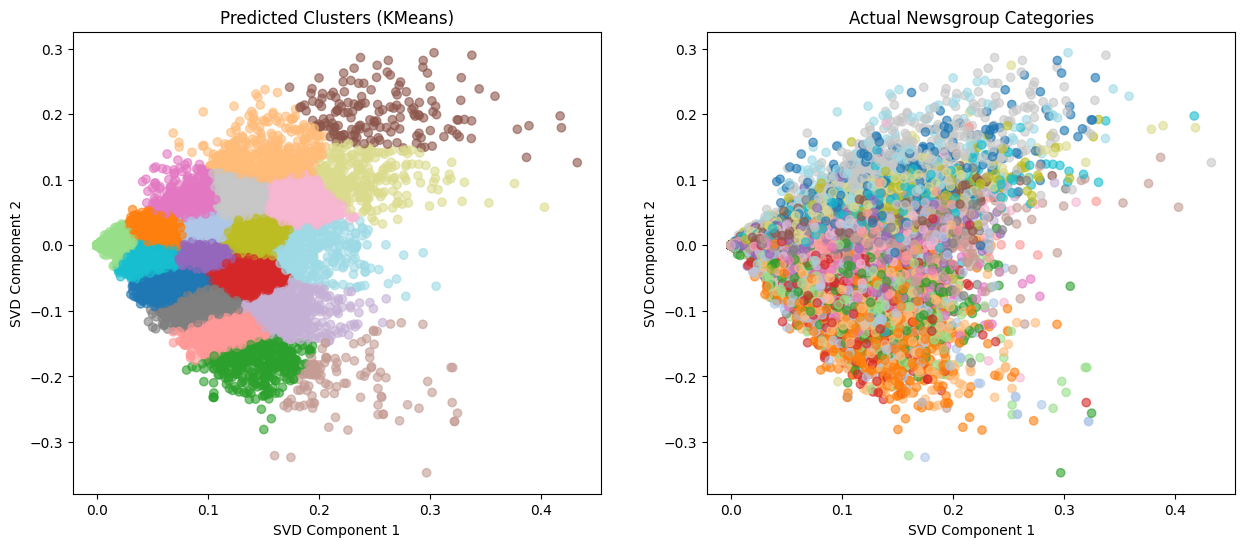

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

ax1.scatter(X_svd[:, 0], X_svd[:, 1], c=y_pred, cmap='tab20', alpha=0.6)
ax1.set_title('Predicted Clusters (KMeans)')
ax1.set_xlabel('SVD Component 1')
ax1.set_ylabel('SVD Component 2')

ax2.scatter(X_svd[:, 0], X_svd[:, 1], c=y, cmap='tab20', alpha=0.6)
ax2.set_title('Actual Newsgroup Categories')
ax2.set_xlabel('SVD Component 1')
ax2.set_ylabel('SVD Component 2')

plt.show()